In [1]:
## Digit Recognizer

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#DL liblary
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.decomposition import PCA

In [83]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
label = train['label']

In [84]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [85]:
train = train.iloc[:,1:]

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


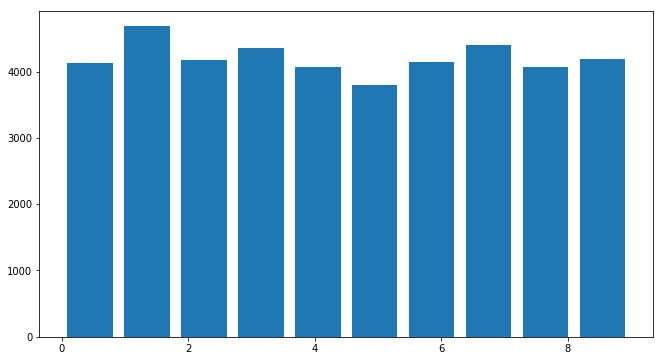

In [86]:
print(label.value_counts())
plt.figure(figsize=(11,6))
plt.hist(label, bins=10, rwidth=0.8)
plt.show()

In [87]:
print(train.info())
print("dimensoin before change category : {}".format(label.shape))
#change label to matrix category
label = to_categorical(label)
print("after change category to matrix : {}".format(label.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 251.2 MB
None
dimensoin before change category : (42000,)
after change category to matrix : (42000, 10)


In [88]:
ar_train=train.values
ar_test=test.values

print(np.max(ar_train))
print(np.min(ar_train))
#scala 0-255
#let's scaling
ar_train = ar_train/255
ar_test = ar_test/255

print("after scaling")
print(np.max(ar_train))
print(np.min(ar_test))

255
0
after scaling
1.0
0.0


In [365]:
pca = PCA(n_components=350)
pca_train = pca.fit_transform(ar_train)
variances=pca.explained_variance_
variances_ratio = pca.explained_variance_ratio_
n_components=pca.n_components_
components = pca.components_

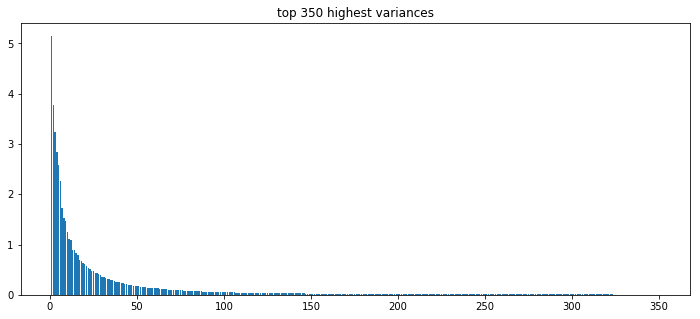

In [366]:
xlabel=np.arange(len(variances))+1
plt.figure(figsize=(12, 5))
plt.bar(xlabel, variances)
plt.title("top 350 highest variances")
plt.show()

The Label is : 1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]

The Label is : 0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

The Label is : 1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]

The Label is : 4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]

The Label is : 0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

The Label is : 0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

The Label is : 7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]

The Label is : 3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]



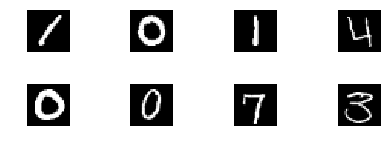

In [367]:
#show View Image
i=0
for image in ar_train[:8,:] :
    plt.subplot(4, 4, i+1)
    print("The Label is : {}".format(np.argmax(label[i,:], axis=0)))
    print(label[i])
    print()
    image=image.reshape(28,28)
    plt.imshow(image)
    plt.axis('off')
    i=i+1

plt.tight_layout()
plt.show()

In [368]:
early_stop = EarlyStopping(patience=3)
n_col = pca_train.shape[1]
model = Sequential()
#layer 1 with 50 neuron and input
model.add(Dense(40, activation='relu', input_shape=(n_col,)))
#layer 2 with 50 neuron
model.add(Dense(60, activation='relu'))
#layer 3 with 50 neuron
model.add(Dense(60, activation='relu'))
#output with activation softmax since we deal with classification, so the output are prob
model.add(Dense(10, activation='softmax'))
#Optimize model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#Train model with cross Validation
#epoch = how many train with forward propagation and bacward propagation
#early stopping mean, the train will be stop after if the accuracy didnnt increase
history=model.fit(pca_train, label, validation_split=0.2, epochs=40, callbacks=[early_stop])

Train on 33600 samples, validate on 8400 samples
Epoch 1/40
33600/33600 [==============================] - 2s 72us/step - loss: 0.4377 - acc: 0.8732 - val_loss: 0.2162 - val_acc: 0.9338
Epoch 2/40
33600/33600 [==============================] - 2s 62us/step - loss: 0.1544 - acc: 0.9539 - val_loss: 0.1580 - val_acc: 0.9527
Epoch 3/40
33600/33600 [==============================] - 2s 66us/step - loss: 0.1062 - acc: 0.9677 - val_loss: 0.1481 - val_acc: 0.9536
Epoch 4/40
33600/33600 [==============================] - 2s 70us/step - loss: 0.0764 - acc: 0.9771 - val_loss: 0.1379 - val_acc: 0.9583
Epoch 5/40
33600/33600 [==============================] - 2s 62us/step - loss: 0.0576 - acc: 0.9826 - val_loss: 0.1429 - val_acc: 0.9583
Epoch 6/40
33600/33600 [==============================] - 2s 63us/step - loss: 0.0429 - acc: 0.9866 - val_loss: 0.1573 - val_acc: 0.9576
Epoch 7/40
33600/33600 [==============================] - 2s 64us/step - loss: 0.0366 - acc: 0.9880 - val_loss: 0.1668 - val_acc:

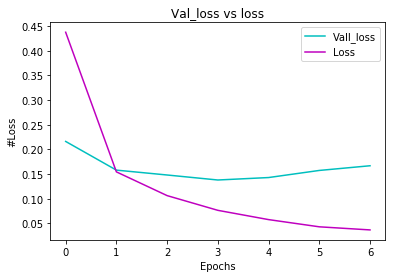

In [369]:
val_loss=history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss, 'c', loss, 'm')
plt.title('Val_loss vs loss')
plt.xlabel('Epochs')
plt.ylabel('#Loss')
plt.legend(['Vall_loss', 'Loss'], loc='upper right')
plt.show()

In [370]:
pca_test = pca.transform(ar_test)

In [371]:
y_pred = model.predict(pca_test)

In [372]:
label_pred = np.argmax(y_pred, axis=1)
label_pred = pd.DataFrame({"ImageID":list(np.arange(1,28001)), "Label":list(label_pred)})
label_pred=label_pred.set_index(label_pred.ImageID)
label_pred=label_pred.drop(["ImageID"], axis=1)
label_pred.to_csv("Submission_Digit_Recognizer.csv")

In [390]:
def tebak_digit(filename):
    digit = plt.imread(filename)
    print("Digit_Dimension {}".format(digit.shape))
    digit = digit.mean(axis=2)
    print("Digit_Dimension After Reshape {}".format(digit.shape))
    plt.imshow(digit)
    plt.axis('off')
    plt.show()
    
    digit = digit.reshape(1, len(digit)*len(digit))
    digit = pca.transform(digit)
    pred_digit = model.predict(digit)
    
    return np.argmax(pred_digit, axis=1)

Digit_Dimension (40, 40, 4)
Digit_Dimension After Reshape (40, 40)


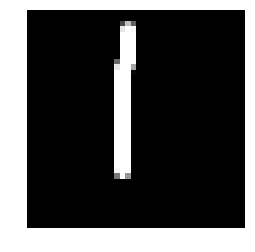

ValueError: operands could not be broadcast together with shapes (1,1600) (784,) 

In [391]:
pred = tebak_digit('digit.png')
print(pred)

In [387]:
img = plt.imread('digit.png')
len(img)*len(img)

784

The Label is : 2
The Label is : 0
The Label is : 9
The Label is : 9
The Label is : 3
The Label is : 7
The Label is : 0
The Label is : 3
The Label is : 0
The Label is : 3


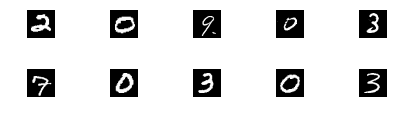

In [379]:
i=0
for image in ar_test[:10,:] :
    plt.subplot(5, 5, i+1)
    print("The Label is : {}".format(label_pred.iloc[i,0]))
    image=image.reshape(28,28)
    plt.imshow(image)
    plt.axis('off')
    i=i+1

plt.tight_layout()
plt.show()